In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, '0')

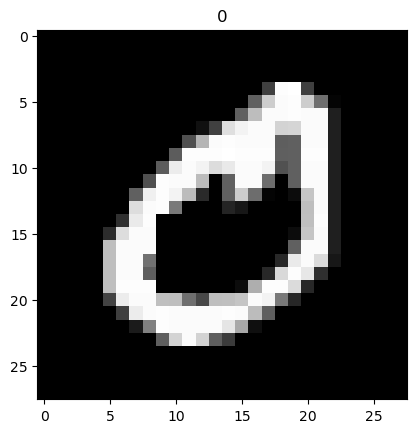

In [66]:
#Aqui para esse modo, devemos separar as variaveis em grupos, e carregar os dados do mnist
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()
#Visualizacao das imagens especificas, primeiro puxamos a imagem, e coloquei no titulo do que se trata a iamgem.
plt.imshow(x_treino[21], cmap = 'gray')
plt.title(y_treino[21])

In [68]:
#os dados se encontram em formato de matriz e precisamos que esteja em formato de vetor, para isso iremos utilizar o reshape
#a matriz está em 28x28 e precisamos do vetor de 784, que é como a RNA é capaz de processar
x_treino = x_treino.reshape((len(x_treino), np.prod(x_treino.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[21]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  49, 180, 253, 244,  50,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 184, 252, 252, 232, 164,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  66, 234, 252, 136,  38,
        56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 236, 25

In [70]:
#Agora vamos transformar em float para poder realizar a normalizaçao
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

In [72]:
#Realizar a normalizaçao, usando 255 pois é o valor maximo de um pixel
x_treino /= 255
x_teste /= 255

In [74]:
y_treino[21]

0

In [76]:
#transformando a classe em formato dummy
y_treino = to_categorical(y_treino, 10)
y_teste = to_categorical(y_teste, 10)
y_treino[21]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
#Estruturando a rede neural: 784 - 64 - 64 -64 - 10
#Camada de entrada pois temos 784 atributos, 3 camadas ocultadas com 64 neuronios, e a camada de saida com 10 pois temos 10 possibilidades (0-9)
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
#Realizamos o dropout a cada camada para evitar o super ajuste, ele ira zerar 20% dos neuronios
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#Camada de saida, ativacao softmax = probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [86]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
#Configuracoes dos parametros da RNA
#Na variavel historico temos o historico das execucoes (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treino, y_treino, epochs = 20, validation_data = (x_teste, y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7514 - loss: 0.7592 - val_accuracy: 0.9503 - val_loss: 0.1709
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9288 - loss: 0.2503 - val_accuracy: 0.9589 - val_loss: 0.1347
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9396 - loss: 0.2013 - val_accuracy: 0.9623 - val_loss: 0.1220
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9489 - loss: 0.1734 - val_accuracy: 0.9680 - val_loss: 0.1175
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9556 - loss: 0.1510 - val_accuracy: 0.9701 - val_loss: 0.1041
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9576 - loss: 0.1434 - val_accuracy: 0.9691 - val_loss: 0.1114
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9599 - loss: 0.1358 - val_accuracy: 0.9717 - val_loss: 0.0970
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1251 - 

In [92]:
previsoes = modelo.predict(x_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.0308059e-09, 5.8703068e-07, 1.8045443e-05, ..., 9.9996340e-01,
        8.4029617e-10, 1.0274977e-05],
       [4.1998698e-09, 3.3531836e-05, 9.9987555e-01, ..., 5.2201858e-06,
        4.8443422e-08, 1.5962768e-11],
       [8.8964676e-09, 9.9990988e-01, 8.4110507e-06, ..., 9.4706347e-06,
        6.0619317e-05, 2.9377503e-07],
       ...,
       [3.2622217e-12, 6.9505277e-11, 9.0104813e-08, ..., 1.6033278e-08,
        5.8907562e-10, 2.2880915e-06],
       [3.2704728e-11, 3.4766572e-14, 3.5694950e-12, ..., 2.5311689e-13,
        6.1634189e-08, 6.4865352e-10],
       [4.9967764e-12, 1.1769014e-20, 8.1417762e-14, ..., 1.8832390e-20,
        1.7768694e-13, 3.5972033e-20]], dtype=float32)

In [98]:
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsao_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsao_matriz)
confusao

array([[ 973,    1,    1,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1126,    3,    1,    0,    0,    1,    0,    4,    0],
       [   2,    2, 1004,    4,    3,    0,    2,    7,    8,    0],
       [   0,    0,    3,  989,    0,   10,    0,    4,    4,    0],
       [   1,    0,    2,    0,  963,    0,    5,    1,    1,    9],
       [   3,    0,    0,   13,    1,  864,    4,    0,    4,    3],
       [   7,    2,    0,    1,    6,    5,  934,    0,    3,    0],
       [   1,    6,   10,    4,    1,    0,    0, 1002,    1,    3],
       [   6,    2,    3,    8,    4,    5,    2,    4,  935,    5],
       [   4,    4,    0,    9,   24,    4,    0,    4,    2,  958]],
      dtype=int64)

In [100]:
#realizando a previsao de um novo caractere (4)
y_treino [20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [104]:
#passa a mesma posicao para o modelo prever
novo = x_treino[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
prev = modelo.predict(novo)
#maior valor
prev = [np.argmax(t) for t in prev]
prev

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[4]